In [13]:
# Imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, median_absolute_error

np.random.seed(0)


In [14]:
"""
Decision Trees
Source: Week 4 Notebook
"""

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# For producing decision tree diagrams.
from IPython.core.display import Image, display
from sklearn.externals.six import StringIO
import pydot

In [15]:
# Load train data
train_labels = pd.read_csv('../Data/final/train_labels_bin_processed.csv', sep=',', engine='python')
train_data = pd.read_csv('../Data/final/train_data_processed.csv', sep=',', engine='python')
print('Train data done')

# Load test data
test_labels = pd.read_csv('../Data/final/test_labels_bin_processed.csv', sep=',', engine='python')
test_data = pd.read_csv('../Data/final/test_data_processed.csv', sep=',', engine='python')
print('Test data done')

Train data done
Test data done


In [16]:
# Check the data
# Check the shape of the data
print("Train data shape:", train_data.shape)
print("Train label shape:", train_labels.shape)

print("Test data shape:", test_data.shape)
print("Test label shape:", test_labels.shape)

# Descriptive stats of train and target data
#print(train_data_2016.describe())
#train_data_2016.head(5)

#train_target_2016['logerror'].head(10)

Train data shape: (130000, 34)
Train label shape: (130000, 1)
Test data shape: (37854, 34)
Test label shape: (37854, 1)


In [17]:
# Classifier 1: Create and fit the Decision Trees classifier using standard parameters

# Create and fit
dt =  DecisionTreeClassifier(max_depth=6,splitter='best',min_samples_leaf=70)
print(cross_val_score(dt, train_data, train_labels))

dt.fit(train_data, train_labels)
# Print the resulting model
print(dt)

[0.56 0.56 0.56]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=70, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [18]:
# Predict test data
predicted = dt.predict(test_data)

print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted))
print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted))
print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted))
print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted))

Mean squared error:    0.4321
Mean absolute error:   0.4321
Median absolute error: 0.0000
Accuracy score: 0.5679


In [7]:
# Test the accuracy of the classifier

# plt.scatter(test_labels, predicted)
# plt.xlabel("Real Error: $Y_i$")
# plt.ylabel("Predicted Error: $\hat{Y}_i$")
# plt.title("Error vs. Predicted Error")
           

In [8]:
# Classifier 2: Create and fit the Decision Trees classifier while looping through the
# max_depth parameter
# Note: A depth of 6 shows the best performance
for i in range(35):
    i = i+1

    # Create and fit
    dt2 =  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=i)
    print("Max depth = ", i)
    print(cross_val_score(dt2, train_data, train_labels))

    dt2.fit(train_data, train_labels)
    # Print the resulting model
    print(dt2)

    # Predict test data
    predicted2 = dt2.predict(test_data)

    print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted2))
    print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted2))
    print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted2))
    print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted2))

Max depth =  1
[0.55817603 0.55816583 0.55816583]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4431
Mean absolute error:   0.4431
Median absolute error: 0.0000
Accuracy score: 0.5569
Max depth =  2
[0.55817603 0.55816583 0.55816583]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Mean squared error:    0.4431
Mean absolute error:   0.4431
Median absolute error: 0.0000
Acc

KeyboardInterrupt: 

In [ ]:
# Classifier 3: Create and fit the Decision Trees classifier while adjusting the leaf size

leaf_size = [50,60,70,80,90,100,110,120,130,140,150]

for i in leaf_size:
    
    # Create and fit
    dt3 =  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, 
                                  min_samples_leaf=i)
    print("Min Leaf = ", i)
    print(cross_val_score(dt3, train_data, train_labels))

    dt3.fit(train_data, train_labels)
    # Print the resulting model
    print(dt3)

    # Predict test data
    predicted3 = dt3.predict(test_data)

    print("Mean squared error:    %.4f" %mean_squared_error(test_labels, predicted3))
    print("Mean absolute error:   %.4f" %mean_absolute_error(test_labels, predicted3))
    print("Median absolute error: %.4f" %median_absolute_error(test_labels, predicted3))
    print("Accuracy score: %.4f" %accuracy_score(test_labels, predicted3))

Normalized confusion matrix
[[0.15 0.85]
 [0.1  0.9 ]]


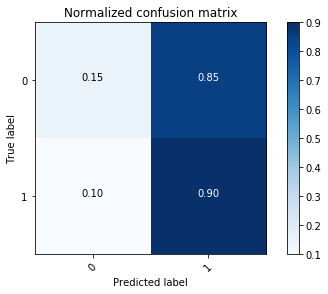

In [19]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(test_labels, predicted)
np.set_printoptions(precision=2)

class_names = ["0", "1"]

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')